In [1]:
import statsmodels.api as sm 
from sklearn import datasets 
import numpy as np  
from sklearn import linear_model 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

data = pd.read_csv('LSE_DA301_Week_1_files/Data/salary_data.csv') 

data.head() 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
# basic stats
# descriptive statistics.
data.describe() 

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
# Define the dependent variable.
y = data['Salary'].values.reshape(-1, 1) 

# Define the independent variable.
x = data['YearsExperience'].values.reshape(-1, 1)

# reshape is convert from e.g. (30,), which is 1D, to (30,1) i.e. 2D
x.shape

(30, 1)

In [9]:
# Specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x, y) 

LinearRegression()

In [10]:
# Print the target values.
lm.predict(x) 

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [13]:
# note: unlike statsmodels, there is no summary table. But we can view the elements individually:
print(lm.intercept_)
print(lm.coef_) 

[25792.20019867]
[[9449.96232146]]


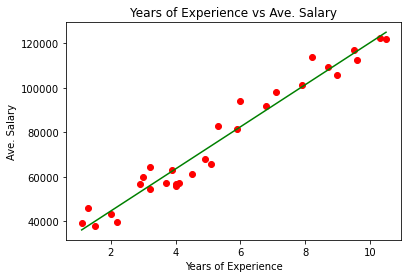

In [14]:
# Create a scatterplot (with red data points). 
plt.scatter(x, y, color = 'red')  

# Create a regression line in green.
plt.plot(x, lm.predict(x), color = 'green') 

#Set the title and labels for the graph.
plt.title("Years of Experience vs Ave. Salary") 
plt.xlabel("Years of Experience") 
plt.ylabel("Ave. Salary")

# Print the graph. 
plt.show() 

In [15]:
# send in some values for x and make some predictions:

# Use the predict() method with an array to call the 
# salaries for each number of years’ experience.
predictedSalary = lm.predict([[5],[10],[15],[20],[25],[30]])  

# Print the results.
print(predictedSalary)

[[ 73042.01180594]
 [120291.82341322]
 [167541.63502049]
 [214791.44662777]
 [262041.25823505]
 [309291.06984232]]


### Using a test and train split 

In [16]:
#  Import the sklearn module.
from sklearn.model_selection import train_test_split 

# Create  the subset (50/50); 
# Control the shuffling/avoid variation in values between variable.
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.5, 
                                                 random_state=100)

In [17]:
# Linear regression; fitting the model.
lm.fit(x_train,y_train)

LinearRegression()

0.9382035605624517
Intercept value:  [24768.13991346]
Coefficient value:  [[9981.76903593]]


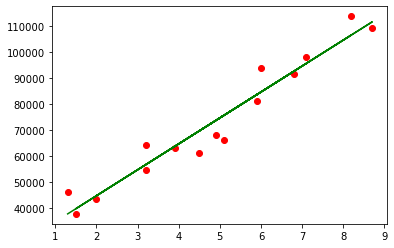

In [21]:
# Predict the training set values.
y_pred = lm.predict(x_train)
# Create a scatterplot with regression line.
plt.scatter(x_train, y_train, color = 'red')  
plt.plot(x_train, y_pred, color = 'green')

# Print R-squared value of the training data.
print(lm.score(x_train,y_train)) 
# Print the intercept value.
print("Intercept value: ", lm.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

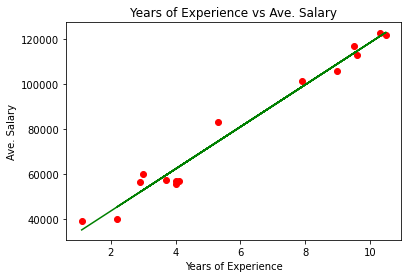

In [22]:
# Linear regression; fitting the model.
lm.fit(x_test,y_test)
# Predict the test set values.
y_pred = lm.predict(x_test) 

# Create a scatterplot with regression line.
plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_test, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("Years of Experience vs Ave. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Ave. Salary") 

# Print the graph. 
plt.show() 

In [23]:
# Print R-squared value of the test data.
print(lm.score(x_test,y_test)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

0.9742725108027231
Intercept value:  [24929.61625619]
Coefficient value:  [[9333.43003625]]
